In [3]:
from dwave_sapi2.core import solve_ising
from dwave_sapi2.embedding import find_embedding, embed_problem, unembed_answer
from dwave_sapi2.util import get_hardware_adjacency
from dwave_sapi2.remote import RemoteConnection
DWAVE_SAPI_URL = 'https://cloud.dwavesys.com/sapi'
DWAVE_TOKEN = [DEV-cae4b103b938b07c613ba0e864afe3f35a6dce14]
DWAVE_SOLVER = 'DW_2000Q_VFYC_1'


ModuleNotFoundError: ignored

In [4]:
!git clone https://github.com/dwavesystems/dwave-ocean-sdk.git
!cd dwave-ocean-sdk
!python setup.py install

Cloning into 'dwave-ocean-sdk'...
remote: Enumerating objects: 4385, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 4385 (delta 3), reused 5 (delta 1), pack-reused 4374
Receiving objects: 100% (4385/4385), 13.20 MiB | 26.87 MiB/s, done.
Resolving deltas: 100% (2807/2807), done.
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [5]:
!python '/content/dwave-ocean-sdk/setup.py' install

running install
running bdist_egg
running egg_info
creating UNKNOWN.egg-info
writing UNKNOWN.egg-info/PKG-INFO
writing dependency_links to UNKNOWN.egg-info/dependency_links.txt
writing top-level names to UNKNOWN.egg-info/top_level.txt
writing manifest file 'UNKNOWN.egg-info/SOURCES.txt'
reading manifest file 'UNKNOWN.egg-info/SOURCES.txt'
writing manifest file 'UNKNOWN.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying UNKNOWN.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying UNKNOWN.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying UNKNOWN.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying UNKNOWN.egg-info/top_level.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
zip_safe flag not set; analyzing archive contents...
creating dist
creating

In [ ]:
J = {(0,4): 1, (4,3): 1, (3,7): 1, (7,0): 1}
h = [-1,0,0,0,0,0,0,0,0]
params = {"answer_mode": 'histogram', "num_reads": 10000}
results = solve_ising(solver, h, J, **params)
print results
connection = RemoteConnection(DWAVE_SAPI_URL, DWAVE_TOKEN)
solver = connection.get_solver(DWAVE_SOLVER)

adjacency = get_hardware_adjacency(solver)
embedding = find_embedding(J.keys(), adjacency)
[h, j0, jc, embeddings] = embed_problem(h, J, embedding, adjacency)
J = j0.copy()
J.update(jc)
params = {"answer_mode": 'histogram', "num_reads": 10000}
raw_results = solve_ising(solver, h, J, **params)

print 'Lowest energy found: {}'.format(raw_results['energies'])
print 'Number of occurences: {}'.format(raw_results['num_occurrences'])
unembedded_results = unembed_answer(raw_results['solutions'],
                                    embedding, broken_chains='vote')

print 'Solution string: {}'.format(unembedded_results)

In [8]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy  

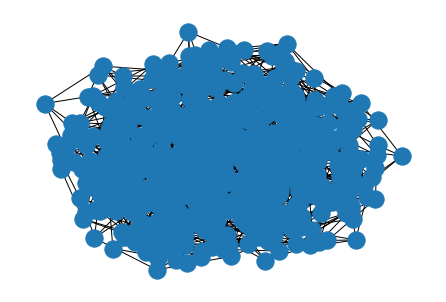

<ipython-input-10-9c475f378a51>:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  rand_adj = -1*scipy.sparse.csr_matrix.toarray(nx.adjacency_matrix(test_graph))


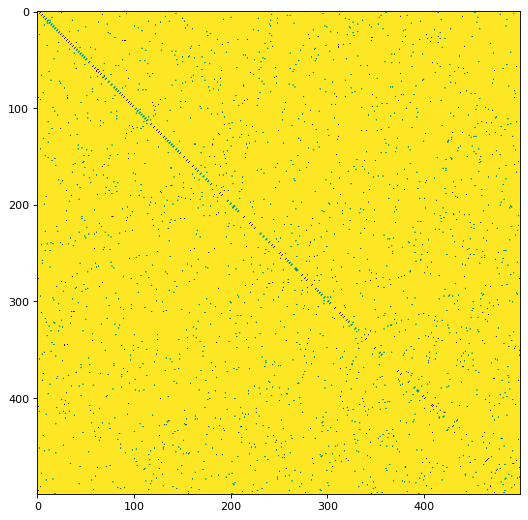

In [10]:
N_spin = 500;

node_con = 5; # connectivity

np.random.seed(451)
test_graph= nx.random_regular_graph(node_con, N_spin)

nx.draw(test_graph)
plt.show()

# you will need pip install --upgrade scipy and restart the kernel to run the following line
rand_adj = -1*scipy.sparse.csr_matrix.toarray(nx.adjacency_matrix(test_graph))

plt.figure(figsize=(8, 8), dpi=80);
plt.imshow(rand_adj);
plt.show()

In [15]:
import dimod
from dwave.system import DWaveSampler, EmbeddingComposite

In [16]:
bqm = dimod.BQM({}, {('s0', 's1'): -1, ('s0', 's2'): -1, ('s1', 's2'): 1}, 0, dimod.Vartype.SPIN)
sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
sampleset = sampler.sample(bqm, num_reads=1000)
print(sampleset)                                                     

ValueError: ignored

In [12]:
h = {}
J = {}
for i in range(N_spin):
    h[i] = 0
    J[i] = 0

In [20]:
DWAVE_SAPI_URL = 'https://cloud.dwavesys.com/sapi'
DWAVE_TOKEN = ['DEV-cae4b103b938b07c613ba0e864afe3f35a6dce14']
DWAVE_SOLVER = 'DW_2000Q_VFYC_1'

In [14]:
model = dimod.BinaryQuadraticModel(h, J, 0.0, vartype='SPIN')
qubo, offset = model.to_qubo()

TypeError: ignored